In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
penguins = sns.load_dataset("penguins")

In [2]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


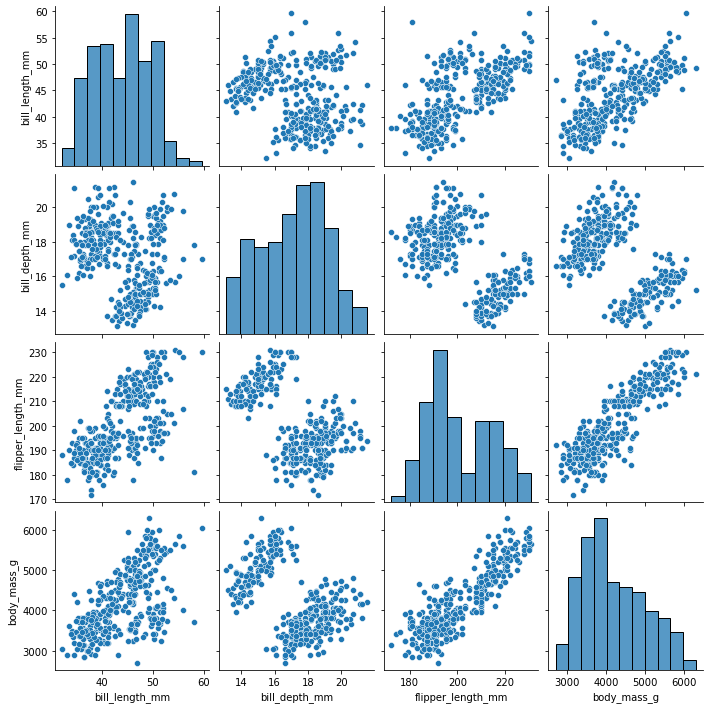

In [3]:
sns.pairplot(penguins)

In [4]:
features = ['bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features].fillna(penguins.mean()))

In [5]:
penguins['cluster'] = km.predict(penguins[features].fillna(penguins.mean()))

In [6]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0


In [7]:
penguins.cluster.value_counts()

0    211
1    133
Name: cluster, dtype: int64

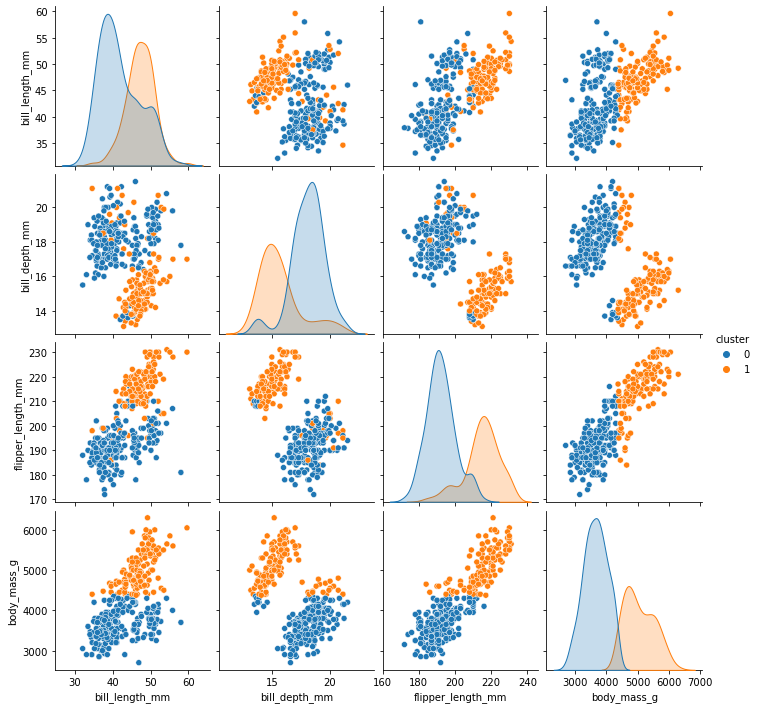

In [8]:
sns.pairplot(penguins, hue="cluster")

In [9]:
metrics.silhouette_score(penguins[features].fillna(penguins.mean()), km.labels_, metric='euclidean')

0.6270788983213472

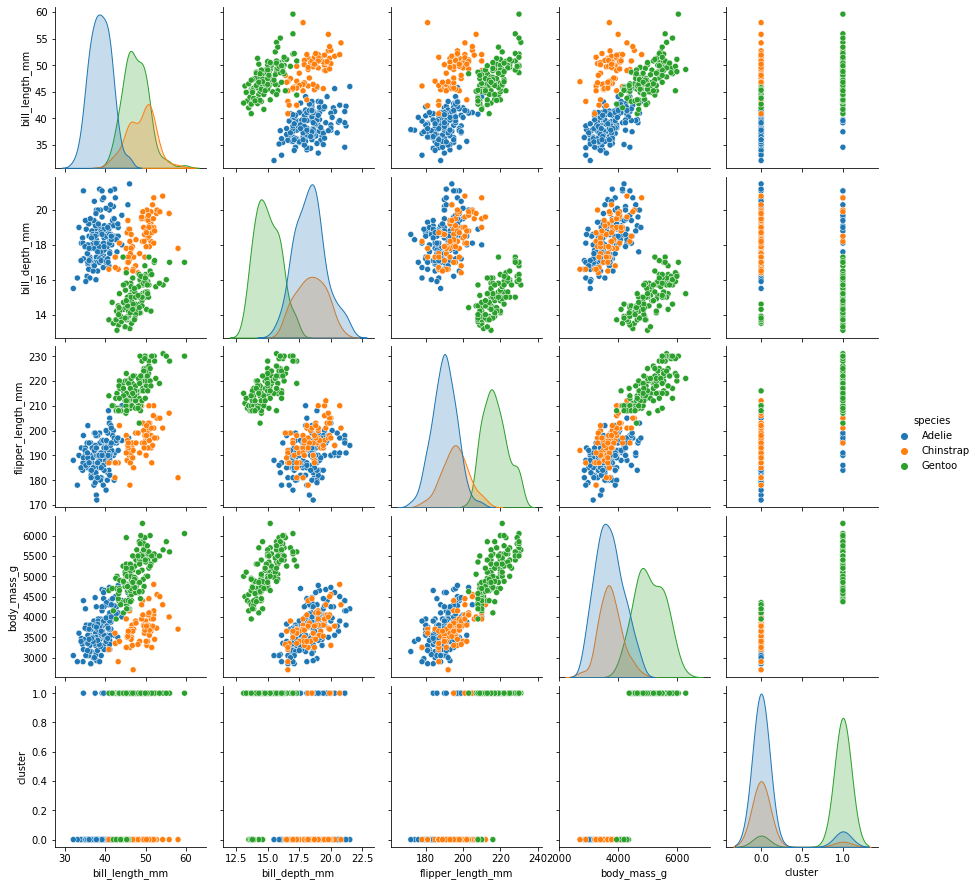

In [10]:
sns.pairplot(penguins, hue="species")

In [11]:
contingency_table = penguins.groupby(['species','cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster,0,1
species,,
Adelie,138,14
Chinstrap,63,5
Gentoo,10,114
